# 초음파 광물 예측하기 : 데이터 확인과 실행

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [5]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [6]:
# 데이터 확인
df = pd.read_csv('./data/sonar.csv', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [20]:
# 데이터 분류
dataset = df.values
X = dataset[:, 0:60].astype('float32')
Y_obj = dataset[:, 60]

In [21]:
# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [22]:
# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
# 모델 실행
model.fit(X, Y, epochs=200, batch_size=5)

Epoch 1/200
42/42 [==============================] - 1s 2ms/step - loss: 0.7042 - accuracy: 0.5192
Epoch 2/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6298
Epoch 3/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6597 - accuracy: 0.6538
Epoch 4/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6971
Epoch 5/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6293 - accuracy: 0.7212
Epoch 6/200
42/42 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7019
Epoch 7/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5909 - accuracy: 0.7163
Epoch 8/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7404
Epoch 9/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7692
Epoch 10/200
42/42 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7644
Epoch 11/

42/42 [==============================] - 0s 3ms/step - loss: 0.1265 - accuracy: 0.9615
Epoch 84/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1276 - accuracy: 0.9615
Epoch 85/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9615
Epoch 86/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9663
Epoch 87/200
42/42 [==============================] - 0s 3ms/step - loss: 0.1161 - accuracy: 0.9567
Epoch 88/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9423
Epoch 89/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.9615
Epoch 90/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1107 - accuracy: 0.9712
Epoch 91/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1065 - accuracy: 0.9663
Epoch 92/200
42/42 [==============================] - 0s 2ms/step - loss: 0.1094 - accuracy: 0.9712
Epoch 93/200


In [25]:
print(f'Accuracy : {model.evaluate(X, Y)[1]}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 1.0000
Accuracy : 1.0


# 초음파 광물 예측하기 : 학습셋과 테스트셋 구분

In [30]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import tensorflow as tf

# seed 값 설정
np.random.seed(0)
tf.random.set_seed(3)

In [31]:
# 데이터 확인
df = pd.read_csv('./data/sonar.csv', header=None)

# 데이터 분류
dataset = df.values
X = dataset[:, 0:60].astype('float32')
Y_obj = dataset[:, 60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [32]:
# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [33]:
# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
# 모델 컴파일
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

In [36]:
# 모델 실행
model.fit(X_train, Y_train, epochs=130, batch_size=5)

Epoch 1/130
29/29 [==============================] - 1s 2ms/step - loss: 0.2472 - accuracy: 0.4897
Epoch 2/130
29/29 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.6414
Epoch 3/130
29/29 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.6207
Epoch 4/130
29/29 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.6897
Epoch 5/130
29/29 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.7379
Epoch 6/130
29/29 [==============================] - 0s 2ms/step - loss: 0.1925 - accuracy: 0.7517
Epoch 7/130
29/29 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.7517
Epoch 8/130
29/29 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 0.8069
Epoch 9/130
29/29 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.7862
Epoch 10/130
29/29 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.8069
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 84/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 1.0000
Epoch 85/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 86/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 87/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 88/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 89/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 90/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 91/130
29/29 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 92/130
29/29 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 93/130


In [41]:
# 테스트셋에 모델 적용
print(f'Test Accuracy : {model.evaluate(X_test, Y_test)[1]:.4f}')

2/2 [==============================] - 0s 4ms/step - loss: 0.1447 - accuracy: 0.8571
Test Accuracy : 0.8571


### **모델 저장과 재사용**

In [42]:
from keras.models import load_model

In [43]:
# 모델을 컴퓨터에 저장
model.save('my_model.h5')

In [44]:
del model # 테스트를 위해 메모리 내의 모델을 삭제
model = load_model('my_model.h5') # 모델을 새로 불러옴

In [45]:
# 새로 불러온 모델로 테스트 실행
# 테스트셋에 모델 적용
print(f'Test Accuracy : {model.evaluate(X_test, Y_test)[1]:.4f}')

2/2 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.8571
Test Accuracy : 0.8571


# 초음파 광물 예측하기 : k겹 교차 검증

In [46]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
import tensorflow as tf

# seed 값 설정
np.random.seed(0)
tf.random.set_seed(0)

In [48]:
df = pd.read_csv('./data/sonar.csv', header=None)

# 데이터 분류
dataset = df.values
X = dataset[:, 0:60].astype('float32')
Y_obj = dataset[:, 60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [50]:
# 10개의 파일로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=0)

In [51]:
# 빈 accuracy 배열
accuracy = []

In [56]:
# 모델의 설정, 컴파일, 실행
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.2507 - accuracy: 0.4545
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2357 - accuracy: 0.5561
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2240 - accuracy: 0.6524
Epoch 4/100
38/38 [==============================] - 0s 3ms/step - loss: 0.2129 - accuracy: 0.7487
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.7219
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1824 - accuracy: 0.7701
Epoch 7/100
38/38 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.8182
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.8128
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.8235
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.8128
Epoch 11/

38/38 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9840
Epoch 84/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9840
Epoch 85/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9893
Epoch 86/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9840
Epoch 87/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9947
Epoch 88/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9893
Epoch 89/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9947
Epoch 90/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9893
Epoch 91/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9947
Epoch 92/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9893
Epoch 93/100


38/38 [==============================] - 0s 2ms/step - loss: 0.0606 - accuracy: 0.9572
Epoch 46/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9305
Epoch 47/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9412
Epoch 48/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9572
Epoch 49/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9465
Epoch 50/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9519
Epoch 51/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9733
Epoch 52/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9572
Epoch 53/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9572
Epoch 54/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0472 - accuracy: 0.9626
Epoch 55/100


1/1 [==============================] - 0s 237ms/step - loss: 0.0292 - accuracy: 1.0000
Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.2545 - accuracy: 0.4973
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.5561
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.5829
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.6417
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.6257
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.7166
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.7166
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1991 - accuracy: 0.7861
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1915 - accuracy: 0.7807
Epoch 10/100
38/38 [==

38/38 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.8984
Epoch 55/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.8930
Epoch 56/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.8984
Epoch 57/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9305
Epoch 58/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0801 - accuracy: 0.9037
Epoch 59/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.8877
Epoch 60/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0742 - accuracy: 0.9144
Epoch 61/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.9198
Epoch 62/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9358
Epoch 63/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9198
Epoch 64/100


38/38 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.8235
Epoch 16/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.8235
Epoch 17/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1318 - accuracy: 0.8182
Epoch 18/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.8396
Epoch 19/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.8182
Epoch 20/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.8289
Epoch 21/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.8342
Epoch 22/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1168 - accuracy: 0.8289
Epoch 23/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1120 - accuracy: 0.8717
Epoch 24/100
38/38 [==============================] - 0s 2ms/step - loss: 0.1140 - accuracy: 0.8610
Epoch 25/100


38/38 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 1.0000
Epoch 98/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0169 - accuracy: 0.9947
Epoch 99/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 0s 193ms/step - loss: 0.1103 - accuracy: 0.8095
Epoch 1/100
38/38 [==============================] - 1s 2ms/step - loss: 0.2506 - accuracy: 0.5160
Epoch 2/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.5798
Epoch 3/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2307 - accuracy: 0.6170
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2186 - accuracy: 0.7287
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.7234
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.2007 - accuracy: 0.7447
Epoch 7/100
38/38 

38/38 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9255
Epoch 60/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9309
Epoch 61/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9521
Epoch 62/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0587 - accuracy: 0.9574
Epoch 63/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0582 - accuracy: 0.9468
Epoch 64/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9468
Epoch 65/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0533 - accuracy: 0.9521
Epoch 66/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9574
Epoch 67/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9574
Epoch 68/100
38/38 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9628
Epoch 69/100


In [60]:
# 결과 출력
print(f'{n_fold} fold accuracy : {accuracy}')

10 fold accuracy : ['0.7143', '0.8571', '0.7619', '1.0000', '0.8571', '0.8095', '0.9048', '0.8095', '0.9500', '0.9000']


# 와인의 종류 예측하기 : 데이터 확인과 실행

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [6]:
# 데이터 입력
df_pre = pd.read_csv('./data/wine.csv', header=None)
df = df_pre.sample(frac=1) # sample() 함수는 원본 데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [7]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# 모델 컴파일 및 실행
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X, Y, epochs=200, batch_size=200)

Epoch 1/200
33/33 [==============================] - 1s 2ms/step - loss: 0.6740 - accuracy: 0.7522
Epoch 2/200
33/33 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8952
Epoch 3/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2476 - accuracy: 0.9235
Epoch 4/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9272
Epoch 5/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2201 - accuracy: 0.9280
Epoch 6/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9312
Epoch 7/200
33/33 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9338
Epoch 8/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1985 - accuracy: 0.9341
Epoch 9/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9364
Epoch 10/200
33/33 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.9372
Epoch 11/

33/33 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9809
Epoch 84/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9803
Epoch 85/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9801
Epoch 86/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9797
Epoch 87/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9818
Epoch 88/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0632 - accuracy: 0.9801
Epoch 89/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9811
Epoch 90/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9791
Epoch 91/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0616 - accuracy: 0.9809
Epoch 92/200
33/33 [==============================] - 0s 2ms/step - loss: 0.0598 - accuracy: 0.9812
Epoch 93/200


In [9]:
# 결과 출력
print('Accuracy : %.4f' % (model.evaluate(X, Y)[1]))

204/204 [==============================] - 1s 1ms/step - loss: 0.0470 - accuracy: 0.9861
Accuracy : 0.9861


# 와인의 종류 예측하기 : 모델 업데이트

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [12]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [14]:
df_pre = pd.read_csv("./data/wine.csv", header=None)
df = df_pre.sample(frac=1)

In [15]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [16]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [17]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
# 모델 저장 폴더 설정
MODEL_DIR = './model/' # 모델을 저장하는 폴더
if not os.path.exists(MODEL_DIR): # 만일 위의 폴더가 존재하지 않으면
    os.mkdir(MODEL_DIR) # 이 이름의 폴더를 만들어 줌

In [19]:
# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [21]:
# 모델 실행 및 저장
model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=1, callbacks=[checkpointer])

Epoch 1/200
 1/26 [>.............................] - ETA: 25s - loss: 1.6783 - accuracy: 0.7750
Epoch 00001: val_loss improved from inf to 0.38706, saving model to ./model\01-0.3871.hdf5
26/26 [==============================] - 1s 19ms/step - loss: 0.7107 - accuracy: 0.7350 - val_loss: 0.3871 - val_accuracy: 0.8131
Epoch 2/200
25/26 [===========================>..] - ETA: 0s - loss: 0.3397 - accuracy: 0.8718
Epoch 00002: val_loss improved from 0.38706 to 0.28561, saving model to ./model\02-0.2856.hdf5
26/26 [==============================] - 0s 5ms/step - loss: 0.3385 - accuracy: 0.8724 - val_loss: 0.2856 - val_accuracy: 0.9215
Epoch 3/200
21/26 [=======================>......] - ETA: 0s - loss: 0.2705 - accuracy: 0.9157
Epoch 00003: val_loss improved from 0.28561 to 0.24630, saving model to ./model\03-0.2463.hdf5
26/26 [==============================] - 0s 7ms/step - loss: 0.2614 - accuracy: 0.9175 - val_loss: 0.2463 - val_accuracy: 0.9362
Epoch 4/200
 1/26 [>.........................

Epoch 27/200
20/26 [======================>.......] - ETA: 0s - loss: 0.1441 - accuracy: 0.9465
Epoch 00027: val_loss improved from 0.14690 to 0.14301, saving model to ./model\27-0.1430.hdf5
26/26 [==============================] - 0s 7ms/step - loss: 0.1481 - accuracy: 0.9452 - val_loss: 0.1430 - val_accuracy: 0.9546
Epoch 28/200
 1/26 [>.............................] - ETA: 0s - loss: 0.2057 - accuracy: 0.9250
Epoch 00028: val_loss did not improve from 0.14301
26/26 [==============================] - 0s 4ms/step - loss: 0.1480 - accuracy: 0.9467 - val_loss: 0.1537 - val_accuracy: 0.9515
Epoch 29/200
18/26 [===================>..........] - ETA: 0s - loss: 0.1514 - accuracy: 0.9442
Epoch 00029: val_loss did not improve from 0.14301
26/26 [==============================] - 0s 6ms/step - loss: 0.1464 - accuracy: 0.9465 - val_loss: 0.1434 - val_accuracy: 0.9546
Epoch 30/200
24/26 [==========================>...] - ETA: 0s - loss: 0.1437 - accuracy: 0.9481
Epoch 00030: val_loss improved f

Epoch 54/200
25/26 [===========================>..] - ETA: 0s - loss: 0.0958 - accuracy: 0.9694
Epoch 00054: val_loss did not improve from 0.08583
26/26 [==============================] - 0s 5ms/step - loss: 0.0973 - accuracy: 0.9694 - val_loss: 0.1021 - val_accuracy: 0.9631
Epoch 55/200
20/26 [======================>.......] - ETA: 0s - loss: 0.1007 - accuracy: 0.9685
Epoch 00055: val_loss improved from 0.08583 to 0.08370, saving model to ./model\55-0.0837.hdf5
26/26 [==============================] - 0s 7ms/step - loss: 0.0934 - accuracy: 0.9709 - val_loss: 0.0837 - val_accuracy: 0.9708
Epoch 56/200
26/26 [==============================] - ETA: 0s - loss: 0.0911 - accuracy: 0.9706
Epoch 00056: val_loss did not improve from 0.08370
26/26 [==============================] - 0s 5ms/step - loss: 0.0911 - accuracy: 0.9706 - val_loss: 0.0839 - val_accuracy: 0.9738
Epoch 57/200
18/26 [===================>..........] - ETA: 0s - loss: 0.0846 - accuracy: 0.9700
Epoch 00057: val_loss did not im

Epoch 82/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0632 - accuracy: 0.9850
Epoch 00082: val_loss improved from 0.06457 to 0.06328, saving model to ./model\82-0.0633.hdf5
26/26 [==============================] - 0s 6ms/step - loss: 0.0680 - accuracy: 0.9781 - val_loss: 0.0633 - val_accuracy: 0.9777
Epoch 83/200
19/26 [====================>.........] - ETA: 0s - loss: 0.0650 - accuracy: 0.9803
Epoch 00083: val_loss improved from 0.06328 to 0.06278, saving model to ./model\83-0.0628.hdf5
26/26 [==============================] - 0s 7ms/step - loss: 0.0672 - accuracy: 0.9804 - val_loss: 0.0628 - val_accuracy: 0.9792
Epoch 84/200
23/26 [=========================>....] - ETA: 0s - loss: 0.0751 - accuracy: 0.9767
Epoch 00084: val_loss did not improve from 0.06278
26/26 [==============================] - 0s 5ms/step - loss: 0.0755 - accuracy: 0.9771 - val_loss: 0.0661 - val_accuracy: 0.9785
Epoch 85/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0657 - accur

Epoch 110/200
20/26 [======================>.......] - ETA: 0s - loss: 0.0622 - accuracy: 0.9810
Epoch 00110: val_loss did not improve from 0.05556
26/26 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 0.9811 - val_loss: 0.0557 - val_accuracy: 0.9785
Epoch 111/200
25/26 [===========================>..] - ETA: 0s - loss: 0.0627 - accuracy: 0.9800
Epoch 00111: val_loss did not improve from 0.05556
26/26 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 0.9806 - val_loss: 0.0697 - val_accuracy: 0.9792
Epoch 112/200
20/26 [======================>.......] - ETA: 0s - loss: 0.0666 - accuracy: 0.9785
Epoch 00112: val_loss did not improve from 0.05556
26/26 [==============================] - 0s 5ms/step - loss: 0.0622 - accuracy: 0.9802 - val_loss: 0.0610 - val_accuracy: 0.9808
Epoch 113/200
20/26 [======================>.......] - ETA: 0s - loss: 0.0601 - accuracy: 0.9840
Epoch 00113: val_loss did not improve from 0.05556
26/26 [==============

Epoch 139/200
21/26 [=======================>......] - ETA: 0s - loss: 0.0521 - accuracy: 0.9843
Epoch 00139: val_loss did not improve from 0.05304
26/26 [==============================] - 0s 5ms/step - loss: 0.0538 - accuracy: 0.9838 - val_loss: 0.0543 - val_accuracy: 0.9792
Epoch 140/200
20/26 [======================>.......] - ETA: 0s - loss: 0.0548 - accuracy: 0.9825
Epoch 00140: val_loss did not improve from 0.05304
26/26 [==============================] - 0s 5ms/step - loss: 0.0546 - accuracy: 0.9829 - val_loss: 0.0531 - val_accuracy: 0.9800
Epoch 141/200
21/26 [=======================>......] - ETA: 0s - loss: 0.0474 - accuracy: 0.9848
Epoch 00141: val_loss did not improve from 0.05304
26/26 [==============================] - 0s 5ms/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0576 - val_accuracy: 0.9854
Epoch 142/200
20/26 [======================>.......] - ETA: 0s - loss: 0.0563 - accuracy: 0.9818
Epoch 00142: val_loss did not improve from 0.05304
26/26 [==============

19/26 [====================>.........] - ETA: 0s - loss: 0.0436 - accuracy: 0.9861
Epoch 00197: val_loss did not improve from 0.05010
26/26 [==============================] - 0s 6ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0537 - val_accuracy: 0.9808
Epoch 198/200
 1/26 [>.............................] - ETA: 0s - loss: 0.0535 - accuracy: 0.9850
Epoch 00198: val_loss did not improve from 0.05010
26/26 [==============================] - 0s 4ms/step - loss: 0.0483 - accuracy: 0.9856 - val_loss: 0.0515 - val_accuracy: 0.9815
Epoch 199/200
22/26 [========================>.....] - ETA: 0s - loss: 0.0497 - accuracy: 0.9836
Epoch 00199: val_loss did not improve from 0.05010
26/26 [==============================] - 0s 5ms/step - loss: 0.0507 - accuracy: 0.9838 - val_loss: 0.0655 - val_accuracy: 0.9823
Epoch 200/200
19/26 [====================>.........] - ETA: 0s - loss: 0.0597 - accuracy: 0.9816
Epoch 00200: val_loss did not improve from 0.05010
26/26 [============================

# 와인의 종류 예측하기 : 그래프 표현

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

In [3]:
df_pre = pd.read_csv('./data/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [4]:
# 모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
# 모델 저장 폴더 설정
MODEL_DIR ='./model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [8]:
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

Epoch 1/3500
2/2 [==============================] - 2s 416ms/step - loss: 1.0205 - accuracy: 0.7458 - val_loss: 0.6457 - val_accuracy: 0.7795
Epoch 2/3500
2/2 [==============================] - 0s 42ms/step - loss: 0.7164 - accuracy: 0.7458 - val_loss: 0.6608 - val_accuracy: 0.7019
Epoch 3/3500
2/2 [==============================] - 0s 40ms/step - loss: 0.6585 - accuracy: 0.6723 - val_loss: 0.5957 - val_accuracy: 0.7360
Epoch 4/3500
2/2 [==============================] - 0s 36ms/step - loss: 0.5825 - accuracy: 0.7397 - val_loss: 0.4514 - val_accuracy: 0.7919
Epoch 5/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.4825 - accuracy: 0.7841 - val_loss: 0.4072 - val_accuracy: 0.8168
Epoch 6/3500
2/2 [==============================] - 0s 39ms/step - loss: 0.4578 - accuracy: 0.7979 - val_loss: 0.3705 - val_accuracy: 0.8385
Epoch 7/3500
2/2 [==============================] - 0s 31ms/step - loss: 0.4160 - accuracy: 0.8254 - val_loss: 0.3552 - val_accuracy: 0.8571
Epoch 8/3500

Epoch 59/3500
2/2 [==============================] - 0s 59ms/step - loss: 0.2407 - accuracy: 0.9173 - val_loss: 0.2207 - val_accuracy: 0.9161
Epoch 60/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.2422 - accuracy: 0.9188 - val_loss: 0.2117 - val_accuracy: 0.9193
Epoch 61/3500
2/2 [==============================] - 0s 62ms/step - loss: 0.2379 - accuracy: 0.9158 - val_loss: 0.2048 - val_accuracy: 0.9161
Epoch 62/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.2397 - accuracy: 0.9204 - val_loss: 0.2044 - val_accuracy: 0.9161
Epoch 63/3500
2/2 [==============================] - 0s 61ms/step - loss: 0.2421 - accuracy: 0.9188 - val_loss: 0.2040 - val_accuracy: 0.9193
Epoch 64/3500
2/2 [==============================] - 0s 66ms/step - loss: 0.2395 - accuracy: 0.9204 - val_loss: 0.2063 - val_accuracy: 0.9193
Epoch 65/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.2356 - accuracy: 0.9188 - val_loss: 0.2086 - val_accuracy: 0.9193
Epoch 

2/2 [==============================] - 0s 50ms/step - loss: 0.1998 - accuracy: 0.9311 - val_loss: 0.1821 - val_accuracy: 0.9317
Epoch 117/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.1993 - accuracy: 0.9311 - val_loss: 0.1839 - val_accuracy: 0.9286
Epoch 118/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.1987 - accuracy: 0.9326 - val_loss: 0.1868 - val_accuracy: 0.9317
Epoch 119/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.1974 - accuracy: 0.9357 - val_loss: 0.1819 - val_accuracy: 0.9286
Epoch 120/3500
2/2 [==============================] - 0s 31ms/step - loss: 0.1965 - accuracy: 0.9342 - val_loss: 0.1791 - val_accuracy: 0.9286
Epoch 121/3500
2/2 [==============================] - 0s 41ms/step - loss: 0.1986 - accuracy: 0.9311 - val_loss: 0.1787 - val_accuracy: 0.9286
Epoch 122/3500
2/2 [==============================] - 0s 52ms/step - loss: 0.1973 - accuracy: 0.9326 - val_loss: 0.1817 - val_accuracy: 0.9286
Epoch 123/3500

2/2 [==============================] - 0s 49ms/step - loss: 0.1774 - accuracy: 0.9495 - val_loss: 0.1658 - val_accuracy: 0.9379
Epoch 174/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.1678 - accuracy: 0.9433 - val_loss: 0.1585 - val_accuracy: 0.9441
Epoch 175/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.1738 - accuracy: 0.9418 - val_loss: 0.1581 - val_accuracy: 0.9441
Epoch 176/3500
2/2 [==============================] - 0s 29ms/step - loss: 0.1711 - accuracy: 0.9418 - val_loss: 0.1647 - val_accuracy: 0.9379
Epoch 177/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.1661 - accuracy: 0.9464 - val_loss: 0.1791 - val_accuracy: 0.9534
Epoch 178/3500
2/2 [==============================] - 0s 64ms/step - loss: 0.1715 - accuracy: 0.9495 - val_loss: 0.1645 - val_accuracy: 0.9379
Epoch 179/3500
2/2 [==============================] - 0s 66ms/step - loss: 0.1674 - accuracy: 0.9433 - val_loss: 0.1575 - val_accuracy: 0.9379
Epoch 180/3500

2/2 [==============================] - 0s 51ms/step - loss: 0.1445 - accuracy: 0.9525 - val_loss: 0.1477 - val_accuracy: 0.9627
Epoch 231/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.1445 - accuracy: 0.9602 - val_loss: 0.1525 - val_accuracy: 0.9596
Epoch 232/3500
2/2 [==============================] - 0s 37ms/step - loss: 0.1445 - accuracy: 0.9648 - val_loss: 0.1387 - val_accuracy: 0.9596
Epoch 233/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.1440 - accuracy: 0.9541 - val_loss: 0.1377 - val_accuracy: 0.9534
Epoch 234/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.1433 - accuracy: 0.9525 - val_loss: 0.1470 - val_accuracy: 0.9658
Epoch 235/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.1452 - accuracy: 0.9632 - val_loss: 0.1525 - val_accuracy: 0.9627
Epoch 236/3500
2/2 [==============================] - 0s 33ms/step - loss: 0.1441 - accuracy: 0.9617 - val_loss: 0.1372 - val_accuracy: 0.9596
Epoch 237/3500

2/2 [==============================] - 0s 47ms/step - loss: 0.1305 - accuracy: 0.9740 - val_loss: 0.1319 - val_accuracy: 0.9658
Epoch 288/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.1242 - accuracy: 0.9663 - val_loss: 0.1258 - val_accuracy: 0.9658
Epoch 289/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.1306 - accuracy: 0.9571 - val_loss: 0.1254 - val_accuracy: 0.9689
Epoch 290/3500
2/2 [==============================] - 0s 42ms/step - loss: 0.1255 - accuracy: 0.9571 - val_loss: 0.1410 - val_accuracy: 0.9627
Epoch 291/3500
2/2 [==============================] - 0s 41ms/step - loss: 0.1292 - accuracy: 0.9755 - val_loss: 0.1390 - val_accuracy: 0.9627
Epoch 292/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.1260 - accuracy: 0.9724 - val_loss: 0.1243 - val_accuracy: 0.9689
Epoch 293/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.1283 - accuracy: 0.9587 - val_loss: 0.1244 - val_accuracy: 0.9658
Epoch 294/3500

2/2 [==============================] - 0s 59ms/step - loss: 0.1159 - accuracy: 0.9648 - val_loss: 0.1175 - val_accuracy: 0.9689
Epoch 345/3500
2/2 [==============================] - 0s 59ms/step - loss: 0.1182 - accuracy: 0.9632 - val_loss: 0.1192 - val_accuracy: 0.9689
Epoch 346/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.1126 - accuracy: 0.9724 - val_loss: 0.1243 - val_accuracy: 0.9627
Epoch 347/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.1135 - accuracy: 0.9740 - val_loss: 0.1263 - val_accuracy: 0.9627
Epoch 348/3500
2/2 [==============================] - 0s 33ms/step - loss: 0.1139 - accuracy: 0.9740 - val_loss: 0.1220 - val_accuracy: 0.9658
Epoch 349/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.1119 - accuracy: 0.9724 - val_loss: 0.1170 - val_accuracy: 0.9720
Epoch 350/3500
2/2 [==============================] - 0s 53ms/step - loss: 0.1132 - accuracy: 0.9648 - val_loss: 0.1175 - val_accuracy: 0.9720
Epoch 351/3500

2/2 [==============================] - 0s 49ms/step - loss: 0.1028 - accuracy: 0.9740 - val_loss: 0.1310 - val_accuracy: 0.9689
Epoch 402/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.1114 - accuracy: 0.9770 - val_loss: 0.1170 - val_accuracy: 0.9689
Epoch 403/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.1038 - accuracy: 0.9770 - val_loss: 0.1125 - val_accuracy: 0.9689
Epoch 404/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.1077 - accuracy: 0.9678 - val_loss: 0.1125 - val_accuracy: 0.9689
Epoch 405/3500
2/2 [==============================] - 0s 38ms/step - loss: 0.1051 - accuracy: 0.9709 - val_loss: 0.1169 - val_accuracy: 0.9658
Epoch 406/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.1051 - accuracy: 0.9770 - val_loss: 0.1174 - val_accuracy: 0.9658
Epoch 407/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.1036 - accuracy: 0.9770 - val_loss: 0.1116 - val_accuracy: 0.9689
Epoch 408/3500

2/2 [==============================] - 0s 50ms/step - loss: 0.0949 - accuracy: 0.9770 - val_loss: 0.1059 - val_accuracy: 0.9658
Epoch 459/3500
2/2 [==============================] - 0s 46ms/step - loss: 0.0980 - accuracy: 0.9724 - val_loss: 0.1063 - val_accuracy: 0.9689
Epoch 460/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0970 - accuracy: 0.9755 - val_loss: 0.1131 - val_accuracy: 0.9689
Epoch 461/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0965 - accuracy: 0.9755 - val_loss: 0.1050 - val_accuracy: 0.9689
Epoch 462/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0952 - accuracy: 0.9755 - val_loss: 0.1042 - val_accuracy: 0.9658
Epoch 463/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0960 - accuracy: 0.9755 - val_loss: 0.1058 - val_accuracy: 0.9689
Epoch 464/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0940 - accuracy: 0.9770 - val_loss: 0.1058 - val_accuracy: 0.9689
Epoch 465/3500

2/2 [==============================] - 0s 46ms/step - loss: 0.0897 - accuracy: 0.9770 - val_loss: 0.1015 - val_accuracy: 0.9658
Epoch 516/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0875 - accuracy: 0.9770 - val_loss: 0.1000 - val_accuracy: 0.9627
Epoch 517/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.0893 - accuracy: 0.9755 - val_loss: 0.1015 - val_accuracy: 0.9658
Epoch 518/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.0865 - accuracy: 0.9755 - val_loss: 0.1114 - val_accuracy: 0.9689
Epoch 519/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.0903 - accuracy: 0.9755 - val_loss: 0.1010 - val_accuracy: 0.9658
Epoch 520/3500
2/2 [==============================] - 0s 52ms/step - loss: 0.0858 - accuracy: 0.9755 - val_loss: 0.0992 - val_accuracy: 0.9627
Epoch 521/3500
2/2 [==============================] - 0s 57ms/step - loss: 0.0870 - accuracy: 0.9770 - val_loss: 0.1021 - val_accuracy: 0.9658
Epoch 522/3500

2/2 [==============================] - 0s 52ms/step - loss: 0.0785 - accuracy: 0.9786 - val_loss: 0.0981 - val_accuracy: 0.9689
Epoch 573/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.0779 - accuracy: 0.9801 - val_loss: 0.1024 - val_accuracy: 0.9689
Epoch 574/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0803 - accuracy: 0.9801 - val_loss: 0.1014 - val_accuracy: 0.9689
Epoch 575/3500
2/2 [==============================] - 0s 46ms/step - loss: 0.0792 - accuracy: 0.9801 - val_loss: 0.0955 - val_accuracy: 0.9689
Epoch 576/3500
2/2 [==============================] - 0s 41ms/step - loss: 0.0787 - accuracy: 0.9801 - val_loss: 0.0975 - val_accuracy: 0.9689
Epoch 577/3500
2/2 [==============================] - 0s 36ms/step - loss: 0.0788 - accuracy: 0.9801 - val_loss: 0.1043 - val_accuracy: 0.9783
Epoch 578/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.0791 - accuracy: 0.9770 - val_loss: 0.0954 - val_accuracy: 0.9658
Epoch 579/3500

2/2 [==============================] - 0s 36ms/step - loss: 0.0716 - accuracy: 0.9816 - val_loss: 0.0949 - val_accuracy: 0.9689
Epoch 630/3500
2/2 [==============================] - 0s 59ms/step - loss: 0.0717 - accuracy: 0.9816 - val_loss: 0.0950 - val_accuracy: 0.9689
Epoch 631/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0714 - accuracy: 0.9816 - val_loss: 0.0970 - val_accuracy: 0.9752
Epoch 632/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0717 - accuracy: 0.9801 - val_loss: 0.0938 - val_accuracy: 0.9689
Epoch 633/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0719 - accuracy: 0.9801 - val_loss: 0.0930 - val_accuracy: 0.9689
Epoch 634/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0717 - accuracy: 0.9816 - val_loss: 0.0968 - val_accuracy: 0.9720
Epoch 635/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.0712 - accuracy: 0.9801 - val_loss: 0.1014 - val_accuracy: 0.9783
Epoch 636/3500

2/2 [==============================] - 0s 31ms/step - loss: 0.0631 - accuracy: 0.9832 - val_loss: 0.0888 - val_accuracy: 0.9658
Epoch 687/3500
2/2 [==============================] - 0s 30ms/step - loss: 0.0696 - accuracy: 0.9770 - val_loss: 0.0877 - val_accuracy: 0.9783
Epoch 688/3500
2/2 [==============================] - 0s 30ms/step - loss: 0.0648 - accuracy: 0.9801 - val_loss: 0.1031 - val_accuracy: 0.9752
Epoch 689/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0687 - accuracy: 0.9786 - val_loss: 0.0853 - val_accuracy: 0.9720
Epoch 690/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0622 - accuracy: 0.9816 - val_loss: 0.0887 - val_accuracy: 0.9658
Epoch 691/3500
2/2 [==============================] - 0s 53ms/step - loss: 0.0698 - accuracy: 0.9786 - val_loss: 0.0895 - val_accuracy: 0.9783
Epoch 692/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0648 - accuracy: 0.9770 - val_loss: 0.1087 - val_accuracy: 0.9783
Epoch 693/3500

2/2 [==============================] - 0s 47ms/step - loss: 0.0576 - accuracy: 0.9832 - val_loss: 0.0889 - val_accuracy: 0.9783
Epoch 744/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0567 - accuracy: 0.9832 - val_loss: 0.0912 - val_accuracy: 0.9783
Epoch 745/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0571 - accuracy: 0.9801 - val_loss: 0.0901 - val_accuracy: 0.9752
Epoch 746/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0560 - accuracy: 0.9832 - val_loss: 0.0918 - val_accuracy: 0.9752
Epoch 747/3500
2/2 [==============================] - 0s 42ms/step - loss: 0.0557 - accuracy: 0.9832 - val_loss: 0.0908 - val_accuracy: 0.9783
Epoch 748/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.0558 - accuracy: 0.9816 - val_loss: 0.0921 - val_accuracy: 0.9783
Epoch 749/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.0560 - accuracy: 0.9816 - val_loss: 0.0952 - val_accuracy: 0.9783
Epoch 750/3500

2/2 [==============================] - 0s 50ms/step - loss: 0.0516 - accuracy: 0.9832 - val_loss: 0.0931 - val_accuracy: 0.9814
Epoch 801/3500
2/2 [==============================] - 0s 52ms/step - loss: 0.0513 - accuracy: 0.9832 - val_loss: 0.0962 - val_accuracy: 0.9783
Epoch 802/3500
2/2 [==============================] - 0s 60ms/step - loss: 0.0519 - accuracy: 0.9832 - val_loss: 0.0923 - val_accuracy: 0.9814
Epoch 803/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0510 - accuracy: 0.9847 - val_loss: 0.0918 - val_accuracy: 0.9814
Epoch 804/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0939 - val_accuracy: 0.9814
Epoch 805/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.0923 - val_accuracy: 0.9814
Epoch 806/3500
2/2 [==============================] - 0s 40ms/step - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.0905 - val_accuracy: 0.9783
Epoch 807/3500

2/2 [==============================] - 0s 53ms/step - loss: 0.0511 - accuracy: 0.9847 - val_loss: 0.0955 - val_accuracy: 0.9814
Epoch 858/3500
2/2 [==============================] - 0s 38ms/step - loss: 0.0495 - accuracy: 0.9832 - val_loss: 0.0905 - val_accuracy: 0.9814
Epoch 859/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0492 - accuracy: 0.9877 - val_loss: 0.0953 - val_accuracy: 0.9814
Epoch 860/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0493 - accuracy: 0.9832 - val_loss: 0.1028 - val_accuracy: 0.9783
Epoch 861/3500
2/2 [==============================] - 0s 46ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0918 - val_accuracy: 0.9783
Epoch 862/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0481 - accuracy: 0.9877 - val_loss: 0.0923 - val_accuracy: 0.9783
Epoch 863/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 0.0999 - val_accuracy: 0.9814
Epoch 864/3500

2/2 [==============================] - 0s 54ms/step - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.0981 - val_accuracy: 0.9752
Epoch 915/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.0487 - accuracy: 0.9877 - val_loss: 0.0962 - val_accuracy: 0.9752
Epoch 916/3500
2/2 [==============================] - 0s 64ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.1089 - val_accuracy: 0.9783
Epoch 917/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.0487 - accuracy: 0.9832 - val_loss: 0.1070 - val_accuracy: 0.9783
Epoch 918/3500
2/2 [==============================] - 0s 62ms/step - loss: 0.0449 - accuracy: 0.9847 - val_loss: 0.0938 - val_accuracy: 0.9783
Epoch 919/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0481 - accuracy: 0.9847 - val_loss: 0.0932 - val_accuracy: 0.9752
Epoch 920/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0490 - accuracy: 0.9877 - val_loss: 0.0985 - val_accuracy: 0.9783
Epoch 921/3500

2/2 [==============================] - 0s 44ms/step - loss: 0.0424 - accuracy: 0.9862 - val_loss: 0.0999 - val_accuracy: 0.9783
Epoch 972/3500
2/2 [==============================] - 0s 42ms/step - loss: 0.0421 - accuracy: 0.9893 - val_loss: 0.0996 - val_accuracy: 0.9783
Epoch 973/3500
2/2 [==============================] - 0s 41ms/step - loss: 0.0407 - accuracy: 0.9893 - val_loss: 0.0939 - val_accuracy: 0.9814
Epoch 974/3500
2/2 [==============================] - 0s 67ms/step - loss: 0.0447 - accuracy: 0.9862 - val_loss: 0.0948 - val_accuracy: 0.9814
Epoch 975/3500
2/2 [==============================] - 0s 53ms/step - loss: 0.0447 - accuracy: 0.9847 - val_loss: 0.1026 - val_accuracy: 0.9783
Epoch 976/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.0414 - accuracy: 0.9908 - val_loss: 0.0960 - val_accuracy: 0.9783
Epoch 977/3500
2/2 [==============================] - 0s 56ms/step - loss: 0.0425 - accuracy: 0.9862 - val_loss: 0.0963 - val_accuracy: 0.9783
Epoch 978/3500

2/2 [==============================] - 0s 51ms/step - loss: 0.0407 - accuracy: 0.9862 - val_loss: 0.0974 - val_accuracy: 0.9783
Epoch 1029/3500
2/2 [==============================] - 0s 34ms/step - loss: 0.0405 - accuracy: 0.9847 - val_loss: 0.1013 - val_accuracy: 0.9783
Epoch 1030/3500
2/2 [==============================] - 0s 30ms/step - loss: 0.0385 - accuracy: 0.9893 - val_loss: 0.0994 - val_accuracy: 0.9783
Epoch 1031/3500
2/2 [==============================] - 0s 37ms/step - loss: 0.0381 - accuracy: 0.9908 - val_loss: 0.1020 - val_accuracy: 0.9783
Epoch 1032/3500
2/2 [==============================] - 0s 40ms/step - loss: 0.0389 - accuracy: 0.9893 - val_loss: 0.1006 - val_accuracy: 0.9783
Epoch 1033/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.0391 - accuracy: 0.9908 - val_loss: 0.0972 - val_accuracy: 0.9783
Epoch 1034/3500
2/2 [==============================] - 0s 37ms/step - loss: 0.0380 - accuracy: 0.9877 - val_loss: 0.1014 - val_accuracy: 0.9783
Epoch 10

2/2 [==============================] - 0s 57ms/step - loss: 0.0390 - accuracy: 0.9908 - val_loss: 0.1196 - val_accuracy: 0.9783
Epoch 1086/3500
2/2 [==============================] - 0s 57ms/step - loss: 0.0418 - accuracy: 0.9877 - val_loss: 0.1082 - val_accuracy: 0.9783
Epoch 1087/3500
2/2 [==============================] - 0s 40ms/step - loss: 0.0389 - accuracy: 0.9893 - val_loss: 0.1030 - val_accuracy: 0.9783
Epoch 1088/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0372 - accuracy: 0.9893 - val_loss: 0.1044 - val_accuracy: 0.9783
Epoch 1089/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0361 - accuracy: 0.9893 - val_loss: 0.1033 - val_accuracy: 0.9783
Epoch 1090/3500
2/2 [==============================] - 0s 38ms/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.1073 - val_accuracy: 0.9783
Epoch 1091/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0372 - accuracy: 0.9877 - val_loss: 0.1062 - val_accuracy: 0.9783
Epoch 10

2/2 [==============================] - 0s 65ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.1083 - val_accuracy: 0.9783
Epoch 1143/3500
2/2 [==============================] - 0s 60ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.1067 - val_accuracy: 0.9783
Epoch 1144/3500
2/2 [==============================] - 0s 52ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.1020 - val_accuracy: 0.9752
Epoch 1145/3500
2/2 [==============================] - 0s 65ms/step - loss: 0.0359 - accuracy: 0.9877 - val_loss: 0.1013 - val_accuracy: 0.9752
Epoch 1146/3500
2/2 [==============================] - 0s 53ms/step - loss: 0.0364 - accuracy: 0.9862 - val_loss: 0.1102 - val_accuracy: 0.9783
Epoch 1147/3500
2/2 [==============================] - 0s 56ms/step - loss: 0.0351 - accuracy: 0.9908 - val_loss: 0.1300 - val_accuracy: 0.9752
Epoch 1148/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.0433 - accuracy: 0.9877 - val_loss: 0.1030 - val_accuracy: 0.9814
Epoch 11

2/2 [==============================] - 0s 33ms/step - loss: 0.0324 - accuracy: 0.9908 - val_loss: 0.1060 - val_accuracy: 0.9783
Epoch 1200/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.0316 - accuracy: 0.9893 - val_loss: 0.1045 - val_accuracy: 0.9783
Epoch 1201/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0330 - accuracy: 0.9923 - val_loss: 0.1053 - val_accuracy: 0.9814
Epoch 1202/3500
2/2 [==============================] - 0s 32ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.1103 - val_accuracy: 0.9783
Epoch 1203/3500
2/2 [==============================] - 0s 28ms/step - loss: 0.0312 - accuracy: 0.9893 - val_loss: 0.1191 - val_accuracy: 0.9752
Epoch 1204/3500
2/2 [==============================] - 0s 29ms/step - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.1100 - val_accuracy: 0.9783
Epoch 1205/3500
2/2 [==============================] - 0s 38ms/step - loss: 0.0350 - accuracy: 0.9877 - val_loss: 0.1057 - val_accuracy: 0.9752
Epoch 12

2/2 [==============================] - 0s 53ms/step - loss: 0.0307 - accuracy: 0.9877 - val_loss: 0.1102 - val_accuracy: 0.9783
Epoch 1257/3500
2/2 [==============================] - 0s 60ms/step - loss: 0.0310 - accuracy: 0.9877 - val_loss: 0.1136 - val_accuracy: 0.9783
Epoch 1258/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.0304 - accuracy: 0.9893 - val_loss: 0.1120 - val_accuracy: 0.9783
Epoch 1259/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.1098 - val_accuracy: 0.9783
Epoch 1260/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0301 - accuracy: 0.9893 - val_loss: 0.1103 - val_accuracy: 0.9783
Epoch 1261/3500
2/2 [==============================] - 0s 62ms/step - loss: 0.0294 - accuracy: 0.9893 - val_loss: 0.1091 - val_accuracy: 0.9783
Epoch 1262/3500
2/2 [==============================] - 0s 57ms/step - loss: 0.0304 - accuracy: 0.9893 - val_loss: 0.1117 - val_accuracy: 0.9783
Epoch 12

2/2 [==============================] - 0s 30ms/step - loss: 0.0324 - accuracy: 0.9877 - val_loss: 0.1126 - val_accuracy: 0.9783
Epoch 1314/3500
2/2 [==============================] - 0s 39ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.1120 - val_accuracy: 0.9814
Epoch 1315/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.1127 - val_accuracy: 0.9783
Epoch 1316/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0289 - accuracy: 0.9893 - val_loss: 0.1157 - val_accuracy: 0.9783
Epoch 1317/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.0281 - accuracy: 0.9893 - val_loss: 0.1101 - val_accuracy: 0.9783
Epoch 1318/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.1085 - val_accuracy: 0.9752
Epoch 1319/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0313 - accuracy: 0.9877 - val_loss: 0.1111 - val_accuracy: 0.9783
Epoch 13

2/2 [==============================] - 0s 39ms/step - loss: 0.0313 - accuracy: 0.9893 - val_loss: 0.1244 - val_accuracy: 0.9752
Epoch 1371/3500
2/2 [==============================] - 0s 32ms/step - loss: 0.0296 - accuracy: 0.9877 - val_loss: 0.1080 - val_accuracy: 0.9783
Epoch 1372/3500
2/2 [==============================] - 0s 31ms/step - loss: 0.0286 - accuracy: 0.9923 - val_loss: 0.1078 - val_accuracy: 0.9752
Epoch 1373/3500
2/2 [==============================] - 0s 37ms/step - loss: 0.0291 - accuracy: 0.9923 - val_loss: 0.1165 - val_accuracy: 0.9783
Epoch 1374/3500
2/2 [==============================] - 0s 40ms/step - loss: 0.0276 - accuracy: 0.9893 - val_loss: 0.1177 - val_accuracy: 0.9783
Epoch 1375/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0271 - accuracy: 0.9893 - val_loss: 0.1109 - val_accuracy: 0.9783
Epoch 1376/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.0279 - accuracy: 0.9923 - val_loss: 0.1113 - val_accuracy: 0.9783
Epoch 13

2/2 [==============================] - 0s 40ms/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 0.1199 - val_accuracy: 0.9783
Epoch 1428/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0254 - accuracy: 0.9908 - val_loss: 0.1406 - val_accuracy: 0.9720
Epoch 1429/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.1145 - val_accuracy: 0.9783
Epoch 1430/3500
2/2 [==============================] - 0s 26ms/step - loss: 0.0267 - accuracy: 0.9923 - val_loss: 0.1115 - val_accuracy: 0.9720
Epoch 1431/3500
2/2 [==============================] - 0s 29ms/step - loss: 0.0286 - accuracy: 0.9877 - val_loss: 0.1227 - val_accuracy: 0.9783
Epoch 1432/3500
2/2 [==============================] - 0s 34ms/step - loss: 0.0278 - accuracy: 0.9923 - val_loss: 0.1302 - val_accuracy: 0.9752
Epoch 1433/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0288 - accuracy: 0.9923 - val_loss: 0.1113 - val_accuracy: 0.9783
Epoch 14

2/2 [==============================] - 0s 54ms/step - loss: 0.0254 - accuracy: 0.9923 - val_loss: 0.1205 - val_accuracy: 0.9783
Epoch 1485/3500
2/2 [==============================] - 0s 36ms/step - loss: 0.0242 - accuracy: 0.9908 - val_loss: 0.1150 - val_accuracy: 0.9783
Epoch 1486/3500
2/2 [==============================] - 0s 33ms/step - loss: 0.0266 - accuracy: 0.9923 - val_loss: 0.1188 - val_accuracy: 0.9783
Epoch 1487/3500
2/2 [==============================] - 0s 32ms/step - loss: 0.0244 - accuracy: 0.9939 - val_loss: 0.1248 - val_accuracy: 0.9752
Epoch 1488/3500
2/2 [==============================] - 0s 28ms/step - loss: 0.0244 - accuracy: 0.9923 - val_loss: 0.1176 - val_accuracy: 0.9783
Epoch 1489/3500
2/2 [==============================] - 0s 30ms/step - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.1127 - val_accuracy: 0.9783
Epoch 1490/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.1133 - val_accuracy: 0.9783
Epoch 14

2/2 [==============================] - 0s 42ms/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.1131 - val_accuracy: 0.9783
Epoch 1542/3500
2/2 [==============================] - 0s 56ms/step - loss: 0.0231 - accuracy: 0.9939 - val_loss: 0.1175 - val_accuracy: 0.9783
Epoch 1543/3500
2/2 [==============================] - 0s 46ms/step - loss: 0.0222 - accuracy: 0.9923 - val_loss: 0.1190 - val_accuracy: 0.9783
Epoch 1544/3500
2/2 [==============================] - 0s 59ms/step - loss: 0.0223 - accuracy: 0.9939 - val_loss: 0.1163 - val_accuracy: 0.9783
Epoch 1545/3500
2/2 [==============================] - 0s 42ms/step - loss: 0.0234 - accuracy: 0.9939 - val_loss: 0.1180 - val_accuracy: 0.9783
Epoch 1546/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.0215 - accuracy: 0.9939 - val_loss: 0.1289 - val_accuracy: 0.9752
Epoch 1547/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.0247 - accuracy: 0.9908 - val_loss: 0.1254 - val_accuracy: 0.9752
Epoch 15

2/2 [==============================] - 0s 58ms/step - loss: 0.0218 - accuracy: 0.9908 - val_loss: 0.1276 - val_accuracy: 0.9752
Epoch 1599/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.0225 - accuracy: 0.9923 - val_loss: 0.1175 - val_accuracy: 0.9783
Epoch 1600/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0219 - accuracy: 0.9923 - val_loss: 0.1165 - val_accuracy: 0.9783
Epoch 1601/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.0216 - accuracy: 0.9939 - val_loss: 0.1245 - val_accuracy: 0.9783
Epoch 1602/3500
2/2 [==============================] - 0s 72ms/step - loss: 0.0221 - accuracy: 0.9923 - val_loss: 0.1206 - val_accuracy: 0.9783
Epoch 1603/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.0209 - accuracy: 0.9939 - val_loss: 0.1151 - val_accuracy: 0.9783
Epoch 1604/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.1204 - val_accuracy: 0.9783
Epoch 16

2/2 [==============================] - 0s 54ms/step - loss: 0.0207 - accuracy: 0.9939 - val_loss: 0.1226 - val_accuracy: 0.9783
Epoch 1656/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0199 - accuracy: 0.9954 - val_loss: 0.1264 - val_accuracy: 0.9752
Epoch 1657/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.0203 - accuracy: 0.9939 - val_loss: 0.1260 - val_accuracy: 0.9752
Epoch 1658/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0216 - accuracy: 0.9923 - val_loss: 0.1252 - val_accuracy: 0.9752
Epoch 1659/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.0207 - accuracy: 0.9954 - val_loss: 0.1254 - val_accuracy: 0.9752
Epoch 1660/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0201 - accuracy: 0.9954 - val_loss: 0.1197 - val_accuracy: 0.9783
Epoch 1661/3500
2/2 [==============================] - 0s 32ms/step - loss: 0.0202 - accuracy: 0.9923 - val_loss: 0.1208 - val_accuracy: 0.9783
Epoch 16

2/2 [==============================] - 0s 47ms/step - loss: 0.0194 - accuracy: 0.9969 - val_loss: 0.1227 - val_accuracy: 0.9783
Epoch 1713/3500
2/2 [==============================] - 0s 40ms/step - loss: 0.0193 - accuracy: 0.9939 - val_loss: 0.1241 - val_accuracy: 0.9783
Epoch 1714/3500
2/2 [==============================] - 0s 30ms/step - loss: 0.0194 - accuracy: 0.9923 - val_loss: 0.1275 - val_accuracy: 0.9783
Epoch 1715/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.1268 - val_accuracy: 0.9814
Epoch 1716/3500
2/2 [==============================] - 0s 57ms/step - loss: 0.0203 - accuracy: 0.9939 - val_loss: 0.1252 - val_accuracy: 0.9783
Epoch 1717/3500
2/2 [==============================] - 0s 33ms/step - loss: 0.0199 - accuracy: 0.9923 - val_loss: 0.1219 - val_accuracy: 0.9783
Epoch 1718/3500
2/2 [==============================] - 0s 42ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.1252 - val_accuracy: 0.9783
Epoch 17

2/2 [==============================] - 0s 44ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.1315 - val_accuracy: 0.9752
Epoch 1770/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0197 - accuracy: 0.9969 - val_loss: 0.1248 - val_accuracy: 0.9783
Epoch 1771/3500
2/2 [==============================] - 0s 30ms/step - loss: 0.0215 - accuracy: 0.9939 - val_loss: 0.1271 - val_accuracy: 0.9783
Epoch 1772/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0196 - accuracy: 0.9939 - val_loss: 0.1382 - val_accuracy: 0.9752
Epoch 1773/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0208 - accuracy: 0.9923 - val_loss: 0.1267 - val_accuracy: 0.9814
Epoch 1774/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0195 - accuracy: 0.9954 - val_loss: 0.1201 - val_accuracy: 0.9814
Epoch 1775/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0222 - accuracy: 0.9923 - val_loss: 0.1214 - val_accuracy: 0.9752
Epoch 17

2/2 [==============================] - 0s 51ms/step - loss: 0.0181 - accuracy: 0.9969 - val_loss: 0.1273 - val_accuracy: 0.9783
Epoch 1827/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0180 - accuracy: 0.9954 - val_loss: 0.1308 - val_accuracy: 0.9783
Epoch 1828/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0174 - accuracy: 0.9954 - val_loss: 0.1290 - val_accuracy: 0.9783
Epoch 1829/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0173 - accuracy: 0.9969 - val_loss: 0.1265 - val_accuracy: 0.9783
Epoch 1830/3500
2/2 [==============================] - 0s 53ms/step - loss: 0.0178 - accuracy: 0.9969 - val_loss: 0.1282 - val_accuracy: 0.9783
Epoch 1831/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.0181 - accuracy: 0.9969 - val_loss: 0.1277 - val_accuracy: 0.9783
Epoch 1832/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0190 - accuracy: 0.9954 - val_loss: 0.1336 - val_accuracy: 0.9752
Epoch 18

2/2 [==============================] - 0s 43ms/step - loss: 0.0222 - accuracy: 0.9923 - val_loss: 0.1293 - val_accuracy: 0.9752
Epoch 1884/3500
2/2 [==============================] - 0s 39ms/step - loss: 0.0186 - accuracy: 0.9923 - val_loss: 0.1452 - val_accuracy: 0.9752
Epoch 1885/3500
2/2 [==============================] - 0s 30ms/step - loss: 0.0205 - accuracy: 0.9908 - val_loss: 0.1335 - val_accuracy: 0.9783
Epoch 1886/3500
2/2 [==============================] - 0s 32ms/step - loss: 0.0170 - accuracy: 0.9969 - val_loss: 0.1251 - val_accuracy: 0.9752
Epoch 1887/3500
2/2 [==============================] - 0s 27ms/step - loss: 0.0196 - accuracy: 0.9923 - val_loss: 0.1271 - val_accuracy: 0.9752
Epoch 1888/3500
2/2 [==============================] - 0s 62ms/step - loss: 0.0176 - accuracy: 0.9969 - val_loss: 0.1390 - val_accuracy: 0.9720
Epoch 1889/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.1321 - val_accuracy: 0.9752
Epoch 18

2/2 [==============================] - 0s 54ms/step - loss: 0.0173 - accuracy: 0.9939 - val_loss: 0.1346 - val_accuracy: 0.9783
Epoch 1941/3500
2/2 [==============================] - 0s 60ms/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.1288 - val_accuracy: 0.9814
Epoch 1942/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.0191 - accuracy: 0.9923 - val_loss: 0.1319 - val_accuracy: 0.9752
Epoch 1943/3500
2/2 [==============================] - 0s 37ms/step - loss: 0.0168 - accuracy: 0.9954 - val_loss: 0.1413 - val_accuracy: 0.9752
Epoch 1944/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.0177 - accuracy: 0.9954 - val_loss: 0.1351 - val_accuracy: 0.9752
Epoch 1945/3500
2/2 [==============================] - 0s 46ms/step - loss: 0.0159 - accuracy: 0.9969 - val_loss: 0.1278 - val_accuracy: 0.9783
Epoch 1946/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.1302 - val_accuracy: 0.9752
Epoch 19

2/2 [==============================] - 0s 51ms/step - loss: 0.0152 - accuracy: 0.9985 - val_loss: 0.1325 - val_accuracy: 0.9752
Epoch 1998/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.0169 - accuracy: 0.9939 - val_loss: 0.1337 - val_accuracy: 0.9783
Epoch 1999/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0164 - accuracy: 0.9939 - val_loss: 0.1452 - val_accuracy: 0.9752
Epoch 2000/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0168 - accuracy: 0.9939 - val_loss: 0.1404 - val_accuracy: 0.9752
Epoch 2001/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.1324 - val_accuracy: 0.9752
Epoch 2002/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0153 - accuracy: 0.9954 - val_loss: 0.1316 - val_accuracy: 0.9752
Epoch 2003/3500
2/2 [==============================] - 0s 53ms/step - loss: 0.0170 - accuracy: 0.9954 - val_loss: 0.1324 - val_accuracy: 0.9752
Epoch 20

2/2 [==============================] - 0s 33ms/step - loss: 0.0166 - accuracy: 0.9923 - val_loss: 0.1306 - val_accuracy: 0.9752
Epoch 2055/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0156 - accuracy: 0.9939 - val_loss: 0.1283 - val_accuracy: 0.9783
Epoch 2056/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0172 - accuracy: 0.9939 - val_loss: 0.1350 - val_accuracy: 0.9752
Epoch 2057/3500
2/2 [==============================] - 0s 34ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.1445 - val_accuracy: 0.9752
Epoch 2058/3500
2/2 [==============================] - 0s 57ms/step - loss: 0.0165 - accuracy: 0.9954 - val_loss: 0.1383 - val_accuracy: 0.9752
Epoch 2059/3500
2/2 [==============================] - 0s 37ms/step - loss: 0.0149 - accuracy: 0.9939 - val_loss: 0.1347 - val_accuracy: 0.9752
Epoch 2060/3500
2/2 [==============================] - 0s 39ms/step - loss: 0.0157 - accuracy: 0.9939 - val_loss: 0.1394 - val_accuracy: 0.9752
Epoch 20

2/2 [==============================] - 0s 50ms/step - loss: 0.0139 - accuracy: 0.9969 - val_loss: 0.1453 - val_accuracy: 0.9752
Epoch 2112/3500
2/2 [==============================] - 0s 52ms/step - loss: 0.0165 - accuracy: 0.9939 - val_loss: 0.1400 - val_accuracy: 0.9783
Epoch 2113/3500
2/2 [==============================] - 0s 60ms/step - loss: 0.0163 - accuracy: 0.9954 - val_loss: 0.1333 - val_accuracy: 0.9783
Epoch 2114/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.1350 - val_accuracy: 0.9752
Epoch 2115/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0133 - accuracy: 0.9969 - val_loss: 0.1427 - val_accuracy: 0.9752
Epoch 2116/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0154 - accuracy: 0.9969 - val_loss: 0.1390 - val_accuracy: 0.9752
Epoch 2117/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0158 - accuracy: 0.9969 - val_loss: 0.1344 - val_accuracy: 0.9752
Epoch 21

2/2 [==============================] - 0s 50ms/step - loss: 0.0135 - accuracy: 0.9969 - val_loss: 0.1354 - val_accuracy: 0.9752
Epoch 2169/3500
2/2 [==============================] - 0s 52ms/step - loss: 0.0138 - accuracy: 0.9969 - val_loss: 0.1454 - val_accuracy: 0.9752
Epoch 2170/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0173 - accuracy: 0.9939 - val_loss: 0.1407 - val_accuracy: 0.9752
Epoch 2171/3500
2/2 [==============================] - 0s 29ms/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.1330 - val_accuracy: 0.9783
Epoch 2172/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.0229 - accuracy: 0.9908 - val_loss: 0.1409 - val_accuracy: 0.9783
Epoch 2173/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0183 - accuracy: 0.9923 - val_loss: 0.1616 - val_accuracy: 0.9752
Epoch 2174/3500
2/2 [==============================] - 0s 60ms/step - loss: 0.0193 - accuracy: 0.9923 - val_loss: 0.1382 - val_accuracy: 0.9752
Epoch 21

2/2 [==============================] - 0s 49ms/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.1341 - val_accuracy: 0.9783
Epoch 2226/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.1375 - val_accuracy: 0.9783
Epoch 2227/3500
2/2 [==============================] - 0s 41ms/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.1425 - val_accuracy: 0.9783
Epoch 2228/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.1435 - val_accuracy: 0.9752
Epoch 2229/3500
2/2 [==============================] - 0s 32ms/step - loss: 0.0135 - accuracy: 0.9985 - val_loss: 0.1408 - val_accuracy: 0.9720
Epoch 2230/3500
2/2 [==============================] - 0s 41ms/step - loss: 0.0132 - accuracy: 0.9969 - val_loss: 0.1469 - val_accuracy: 0.9752
Epoch 2231/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.0136 - accuracy: 0.9969 - val_loss: 0.1442 - val_accuracy: 0.9752
Epoch 22

2/2 [==============================] - 0s 35ms/step - loss: 0.0126 - accuracy: 0.9969 - val_loss: 0.1347 - val_accuracy: 0.9783
Epoch 2283/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.1431 - val_accuracy: 0.9783
Epoch 2284/3500
2/2 [==============================] - 0s 34ms/step - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.1475 - val_accuracy: 0.9752
Epoch 2285/3500
2/2 [==============================] - 0s 40ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.1395 - val_accuracy: 0.9814
Epoch 2286/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.1434 - val_accuracy: 0.9814
Epoch 2287/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0143 - accuracy: 0.9954 - val_loss: 0.1589 - val_accuracy: 0.9752
Epoch 2288/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.0163 - accuracy: 0.9923 - val_loss: 0.1538 - val_accuracy: 0.9720
Epoch 22

2/2 [==============================] - 0s 50ms/step - loss: 0.0141 - accuracy: 0.9939 - val_loss: 0.1826 - val_accuracy: 0.9689
Epoch 2340/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0254 - accuracy: 0.9877 - val_loss: 0.1410 - val_accuracy: 0.9783
Epoch 2341/3500
2/2 [==============================] - 0s 42ms/step - loss: 0.0123 - accuracy: 0.9985 - val_loss: 0.1340 - val_accuracy: 0.9720
Epoch 2342/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0183 - accuracy: 0.9923 - val_loss: 0.1396 - val_accuracy: 0.9783
Epoch 2343/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.1558 - val_accuracy: 0.9720
Epoch 2344/3500
2/2 [==============================] - 0s 56ms/step - loss: 0.0148 - accuracy: 0.9939 - val_loss: 0.1390 - val_accuracy: 0.9783
Epoch 2345/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0144 - accuracy: 0.9939 - val_loss: 0.1371 - val_accuracy: 0.9752
Epoch 23

2/2 [==============================] - 0s 33ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.1443 - val_accuracy: 0.9783
Epoch 2397/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.0129 - accuracy: 0.9954 - val_loss: 0.1507 - val_accuracy: 0.9783
Epoch 2398/3500
2/2 [==============================] - 0s 46ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.1578 - val_accuracy: 0.9720
Epoch 2399/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0125 - accuracy: 0.9985 - val_loss: 0.1476 - val_accuracy: 0.9783
Epoch 2400/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.1443 - val_accuracy: 0.9783
Epoch 2401/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0111 - accuracy: 0.9985 - val_loss: 0.1538 - val_accuracy: 0.9752
Epoch 2402/3500
2/2 [==============================] - 0s 36ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.1422 - val_accuracy: 0.9783
Epoch 24

2/2 [==============================] - 0s 49ms/step - loss: 0.0108 - accuracy: 0.9985 - val_loss: 0.1447 - val_accuracy: 0.9783
Epoch 2454/3500
2/2 [==============================] - 0s 32ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.1456 - val_accuracy: 0.9783
Epoch 2455/3500
2/2 [==============================] - 0s 29ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.1484 - val_accuracy: 0.9783
Epoch 2456/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.1469 - val_accuracy: 0.9783
Epoch 2457/3500
2/2 [==============================] - 0s 36ms/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.1483 - val_accuracy: 0.9752
Epoch 2458/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.1424 - val_accuracy: 0.9783
Epoch 2459/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.0122 - accuracy: 0.9985 - val_loss: 0.1418 - val_accuracy: 0.9783
Epoch 24

2/2 [==============================] - 0s 50ms/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.1536 - val_accuracy: 0.9783
Epoch 2511/3500
2/2 [==============================] - 0s 53ms/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.1588 - val_accuracy: 0.9752
Epoch 2512/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0135 - accuracy: 0.9969 - val_loss: 0.1537 - val_accuracy: 0.9783
Epoch 2513/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.1540 - val_accuracy: 0.9783
Epoch 2514/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.0103 - accuracy: 0.9985 - val_loss: 0.1485 - val_accuracy: 0.9783
Epoch 2515/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.1473 - val_accuracy: 0.9783
Epoch 2516/3500
2/2 [==============================] - 0s 66ms/step - loss: 0.0135 - accuracy: 0.9954 - val_loss: 0.1533 - val_accuracy: 0.9814
Epoch 25

2/2 [==============================] - 0s 51ms/step - loss: 0.0101 - accuracy: 0.9985 - val_loss: 0.1520 - val_accuracy: 0.9783
Epoch 2568/3500
2/2 [==============================] - 0s 64ms/step - loss: 0.0099 - accuracy: 0.9985 - val_loss: 0.1491 - val_accuracy: 0.9783
Epoch 2569/3500
2/2 [==============================] - 0s 31ms/step - loss: 0.0102 - accuracy: 0.9985 - val_loss: 0.1522 - val_accuracy: 0.9783
Epoch 2570/3500
2/2 [==============================] - 0s 31ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.1639 - val_accuracy: 0.9752
Epoch 2571/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0125 - accuracy: 0.9939 - val_loss: 0.1514 - val_accuracy: 0.9783
Epoch 2572/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0093 - accuracy: 0.9985 - val_loss: 0.1438 - val_accuracy: 0.9720
Epoch 2573/3500
2/2 [==============================] - 0s 39ms/step - loss: 0.0197 - accuracy: 0.9923 - val_loss: 0.1504 - val_accuracy: 0.9752
Epoch 25

2/2 [==============================] - 0s 64ms/step - loss: 0.0107 - accuracy: 0.9985 - val_loss: 0.1450 - val_accuracy: 0.9814
Epoch 2625/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0125 - accuracy: 0.9954 - val_loss: 0.1452 - val_accuracy: 0.9783
Epoch 2626/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0121 - accuracy: 0.9954 - val_loss: 0.1676 - val_accuracy: 0.9752
Epoch 2627/3500
2/2 [==============================] - 0s 35ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.1648 - val_accuracy: 0.9752
Epoch 2628/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.1484 - val_accuracy: 0.9752
Epoch 2629/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0120 - accuracy: 0.9954 - val_loss: 0.1487 - val_accuracy: 0.9752
Epoch 2630/3500
2/2 [==============================] - 0s 39ms/step - loss: 0.0123 - accuracy: 0.9954 - val_loss: 0.1623 - val_accuracy: 0.9752
Epoch 26

2/2 [==============================] - 0s 62ms/step - loss: 0.0111 - accuracy: 0.9969 - val_loss: 0.1442 - val_accuracy: 0.9783
Epoch 2682/3500
2/2 [==============================] - 0s 60ms/step - loss: 0.0155 - accuracy: 0.9939 - val_loss: 0.1480 - val_accuracy: 0.9783
Epoch 2683/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.1665 - val_accuracy: 0.9720
Epoch 2684/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0131 - accuracy: 0.9939 - val_loss: 0.1689 - val_accuracy: 0.9752
Epoch 2685/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.1495 - val_accuracy: 0.9752
Epoch 2686/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0121 - accuracy: 0.9954 - val_loss: 0.1471 - val_accuracy: 0.9783
Epoch 2687/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.0139 - accuracy: 0.9939 - val_loss: 0.1601 - val_accuracy: 0.9752
Epoch 26

2/2 [==============================] - 0s 42ms/step - loss: 0.0092 - accuracy: 0.9985 - val_loss: 0.1570 - val_accuracy: 0.9783
Epoch 2739/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0092 - accuracy: 0.9985 - val_loss: 0.1566 - val_accuracy: 0.9783
Epoch 2740/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.1559 - val_accuracy: 0.9814
Epoch 2741/3500
2/2 [==============================] - 0s 38ms/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.1560 - val_accuracy: 0.9814
Epoch 2742/3500
2/2 [==============================] - 0s 66ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.1624 - val_accuracy: 0.9752
Epoch 2743/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.1654 - val_accuracy: 0.9752
Epoch 2744/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.0098 - accuracy: 0.9985 - val_loss: 0.1520 - val_accuracy: 0.9783
Epoch 27

2/2 [==============================] - 0s 32ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.1709 - val_accuracy: 0.9752
Epoch 2796/3500
2/2 [==============================] - 0s 31ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.1641 - val_accuracy: 0.9752
Epoch 2797/3500
2/2 [==============================] - 0s 29ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.1571 - val_accuracy: 0.9814
Epoch 2798/3500
2/2 [==============================] - 0s 28ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.1592 - val_accuracy: 0.9814
Epoch 2799/3500
2/2 [==============================] - 0s 34ms/step - loss: 0.0098 - accuracy: 0.9969 - val_loss: 0.1664 - val_accuracy: 0.9814
Epoch 2800/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.1661 - val_accuracy: 0.9752
Epoch 2801/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0092 - accuracy: 0.9985 - val_loss: 0.1633 - val_accuracy: 0.9783
Epoch 28

2/2 [==============================] - 0s 47ms/step - loss: 0.0106 - accuracy: 0.9969 - val_loss: 0.1545 - val_accuracy: 0.9814
Epoch 2853/3500
2/2 [==============================] - 0s 39ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.1633 - val_accuracy: 0.9783
Epoch 2854/3500
2/2 [==============================] - 0s 39ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.1587 - val_accuracy: 0.9752
Epoch 2855/3500
2/2 [==============================] - 0s 56ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.1563 - val_accuracy: 0.9752
Epoch 2856/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.1685 - val_accuracy: 0.9752
Epoch 2857/3500
2/2 [==============================] - 0s 52ms/step - loss: 0.0116 - accuracy: 0.9954 - val_loss: 0.1722 - val_accuracy: 0.9752
Epoch 2858/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0128 - accuracy: 0.9985 - val_loss: 0.1514 - val_accuracy: 0.9783
Epoch 28

2/2 [==============================] - 0s 57ms/step - loss: 0.0115 - accuracy: 0.9954 - val_loss: 0.1694 - val_accuracy: 0.9783
Epoch 2910/3500
2/2 [==============================] - 0s 42ms/step - loss: 0.0147 - accuracy: 0.9939 - val_loss: 0.1606 - val_accuracy: 0.9814
Epoch 2911/3500
2/2 [==============================] - 0s 40ms/step - loss: 0.0125 - accuracy: 0.9954 - val_loss: 0.1496 - val_accuracy: 0.9814
Epoch 2912/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0127 - accuracy: 0.9939 - val_loss: 0.1540 - val_accuracy: 0.9783
Epoch 2913/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.1681 - val_accuracy: 0.9689
Epoch 2914/3500
2/2 [==============================] - 0s 30ms/step - loss: 0.0129 - accuracy: 0.9969 - val_loss: 0.1636 - val_accuracy: 0.9752
Epoch 2915/3500
2/2 [==============================] - 0s 56ms/step - loss: 0.0116 - accuracy: 0.9969 - val_loss: 0.1585 - val_accuracy: 0.9752
Epoch 29

2/2 [==============================] - 0s 57ms/step - loss: 0.0081 - accuracy: 0.9969 - val_loss: 0.1551 - val_accuracy: 0.9752
Epoch 2967/3500
2/2 [==============================] - 0s 57ms/step - loss: 0.0116 - accuracy: 0.9954 - val_loss: 0.1602 - val_accuracy: 0.9783
Epoch 2968/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0087 - accuracy: 0.9985 - val_loss: 0.1758 - val_accuracy: 0.9752
Epoch 2969/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.1675 - val_accuracy: 0.9783
Epoch 2970/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0085 - accuracy: 0.9985 - val_loss: 0.1599 - val_accuracy: 0.9783
Epoch 2971/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.1612 - val_accuracy: 0.9783
Epoch 2972/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0083 - accuracy: 0.9969 - val_loss: 0.1615 - val_accuracy: 0.9752
Epoch 29

2/2 [==============================] - 0s 49ms/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 0.1711 - val_accuracy: 0.9752
Epoch 3024/3500
2/2 [==============================] - 0s 58ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.1667 - val_accuracy: 0.9752
Epoch 3025/3500
2/2 [==============================] - 0s 62ms/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.1578 - val_accuracy: 0.9783
Epoch 3026/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0080 - accuracy: 0.9985 - val_loss: 0.1612 - val_accuracy: 0.9783
Epoch 3027/3500
2/2 [==============================] - 0s 46ms/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.1675 - val_accuracy: 0.9752
Epoch 3028/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0080 - accuracy: 0.9985 - val_loss: 0.1720 - val_accuracy: 0.9752
Epoch 3029/3500
2/2 [==============================] - 0s 36ms/step - loss: 0.0085 - accuracy: 0.9985 - val_loss: 0.1692 - val_accuracy: 0.9752
Epoch 30

2/2 [==============================] - 0s 49ms/step - loss: 0.0122 - accuracy: 0.9954 - val_loss: 0.1695 - val_accuracy: 0.9783
Epoch 3081/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0078 - accuracy: 0.9969 - val_loss: 0.1632 - val_accuracy: 0.9752
Epoch 3082/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.1701 - val_accuracy: 0.9783
Epoch 3083/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0079 - accuracy: 0.9985 - val_loss: 0.1867 - val_accuracy: 0.9752
Epoch 3084/3500
2/2 [==============================] - 0s 63ms/step - loss: 0.0111 - accuracy: 0.9954 - val_loss: 0.1781 - val_accuracy: 0.9752
Epoch 3085/3500
2/2 [==============================] - 0s 56ms/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.1685 - val_accuracy: 0.9783
Epoch 3086/3500
2/2 [==============================] - 0s 52ms/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 0.1652 - val_accuracy: 0.9783
Epoch 30

2/2 [==============================] - 0s 53ms/step - loss: 0.0075 - accuracy: 0.9985 - val_loss: 0.1726 - val_accuracy: 0.9783
Epoch 3138/3500
2/2 [==============================] - 0s 60ms/step - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.1733 - val_accuracy: 0.9783
Epoch 3139/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0087 - accuracy: 0.9985 - val_loss: 0.1682 - val_accuracy: 0.9814
Epoch 3140/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.0083 - accuracy: 0.9969 - val_loss: 0.1667 - val_accuracy: 0.9814
Epoch 3141/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0074 - accuracy: 0.9969 - val_loss: 0.1742 - val_accuracy: 0.9720
Epoch 3142/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0086 - accuracy: 0.9985 - val_loss: 0.1730 - val_accuracy: 0.9752
Epoch 3143/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0086 - accuracy: 0.9985 - val_loss: 0.1606 - val_accuracy: 0.9752
Epoch 31

Epoch 3194/3500
2/2 [==============================] - 0s 41ms/step - loss: 0.0105 - accuracy: 0.9985 - val_loss: 0.1799 - val_accuracy: 0.9783
Epoch 3195/3500
2/2 [==============================] - 0s 61ms/step - loss: 0.0083 - accuracy: 0.9985 - val_loss: 0.1677 - val_accuracy: 0.9783
Epoch 3196/3500
2/2 [==============================] - 0s 51ms/step - loss: 0.0111 - accuracy: 0.9939 - val_loss: 0.1737 - val_accuracy: 0.9814
Epoch 3197/3500
2/2 [==============================] - 0s 32ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.1924 - val_accuracy: 0.9720
Epoch 3198/3500
2/2 [==============================] - 0s 46ms/step - loss: 0.0128 - accuracy: 0.9939 - val_loss: 0.1617 - val_accuracy: 0.9783
Epoch 3199/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.1586 - val_accuracy: 0.9752
Epoch 3200/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0088 - accuracy: 0.9985 - val_loss: 0.1872 - val_accuracy:

Epoch 3251/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.1696 - val_accuracy: 0.9783
Epoch 3252/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0076 - accuracy: 0.9969 - val_loss: 0.2030 - val_accuracy: 0.9689
Epoch 3253/3500
2/2 [==============================] - 0s 52ms/step - loss: 0.0154 - accuracy: 0.9923 - val_loss: 0.1742 - val_accuracy: 0.9783
Epoch 3254/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.1633 - val_accuracy: 0.9783
Epoch 3255/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0110 - accuracy: 0.9954 - val_loss: 0.1703 - val_accuracy: 0.9783
Epoch 3256/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0070 - accuracy: 0.9985 - val_loss: 0.1772 - val_accuracy: 0.9720
Epoch 3257/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0082 - accuracy: 0.9985 - val_loss: 0.1682 - val_accuracy:

Epoch 3308/3500
2/2 [==============================] - 0s 31ms/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 0.1779 - val_accuracy: 0.9814
Epoch 3309/3500
2/2 [==============================] - 0s 34ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.1742 - val_accuracy: 0.9783
Epoch 3310/3500
2/2 [==============================] - 0s 41ms/step - loss: 0.0066 - accuracy: 0.9985 - val_loss: 0.1744 - val_accuracy: 0.9783
Epoch 3311/3500
2/2 [==============================] - 0s 34ms/step - loss: 0.0068 - accuracy: 0.9969 - val_loss: 0.1775 - val_accuracy: 0.9783
Epoch 3312/3500
2/2 [==============================] - 0s 30ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.1772 - val_accuracy: 0.9814
Epoch 3313/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.0067 - accuracy: 0.9985 - val_loss: 0.1769 - val_accuracy: 0.9814
Epoch 3314/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.1787 - val_accuracy:

Epoch 3365/3500
2/2 [==============================] - 0s 32ms/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 0.1968 - val_accuracy: 0.9720
Epoch 3366/3500
2/2 [==============================] - 0s 40ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 0.1750 - val_accuracy: 0.9752
Epoch 3367/3500
2/2 [==============================] - 0s 57ms/step - loss: 0.0068 - accuracy: 0.9969 - val_loss: 0.1683 - val_accuracy: 0.9783
Epoch 3368/3500
2/2 [==============================] - 0s 43ms/step - loss: 0.0119 - accuracy: 0.9939 - val_loss: 0.1820 - val_accuracy: 0.9783
Epoch 3369/3500
2/2 [==============================] - 0s 42ms/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 0.2048 - val_accuracy: 0.9689
Epoch 3370/3500
2/2 [==============================] - 0s 37ms/step - loss: 0.0114 - accuracy: 0.9969 - val_loss: 0.1709 - val_accuracy: 0.9783
Epoch 3371/3500
2/2 [==============================] - 0s 33ms/step - loss: 0.0108 - accuracy: 0.9954 - val_loss: 0.1695 - val_accuracy:

Epoch 3422/3500
2/2 [==============================] - 0s 44ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.1679 - val_accuracy: 0.9783
Epoch 3423/3500
2/2 [==============================] - 0s 34ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.1723 - val_accuracy: 0.9752
Epoch 3424/3500
2/2 [==============================] - 0s 38ms/step - loss: 0.0062 - accuracy: 0.9985 - val_loss: 0.1867 - val_accuracy: 0.9720
Epoch 3425/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0084 - accuracy: 0.9985 - val_loss: 0.1810 - val_accuracy: 0.9720
Epoch 3426/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.1645 - val_accuracy: 0.9783
Epoch 3427/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0084 - accuracy: 0.9969 - val_loss: 0.1634 - val_accuracy: 0.9752
Epoch 3428/3500
2/2 [==============================] - 0s 45ms/step - loss: 0.0090 - accuracy: 0.9969 - val_loss: 0.1792 - val_accuracy:

Epoch 3479/3500
2/2 [==============================] - 0s 50ms/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.1768 - val_accuracy: 0.9783
Epoch 3480/3500
2/2 [==============================] - 0s 49ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.1945 - val_accuracy: 0.9720
Epoch 3481/3500
2/2 [==============================] - 0s 47ms/step - loss: 0.0085 - accuracy: 0.9985 - val_loss: 0.1812 - val_accuracy: 0.9752
Epoch 3482/3500
2/2 [==============================] - 0s 48ms/step - loss: 0.0072 - accuracy: 0.9969 - val_loss: 0.1703 - val_accuracy: 0.9752
Epoch 3483/3500
2/2 [==============================] - 0s 54ms/step - loss: 0.0074 - accuracy: 0.9969 - val_loss: 0.1748 - val_accuracy: 0.9783
Epoch 3484/3500
2/2 [==============================] - 0s 61ms/step - loss: 0.0064 - accuracy: 0.9985 - val_loss: 0.1901 - val_accuracy: 0.9720
Epoch 3485/3500
2/2 [==============================] - 0s 62ms/step - loss: 0.0083 - accuracy: 0.9985 - val_loss: 0.1790 - val_accuracy:

In [12]:
# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss = history.history['val_loss']

# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['val_accuracy']

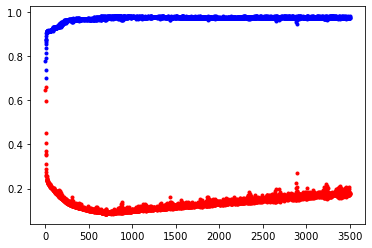

In [14]:
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue', markersize=3)

plt.show()

# 와인의 종류 예측하기 : 학습의 자동 중단

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

df_pre = pd.read_csv('./data/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [17]:
# 모델의 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# 모델 컴파일
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [20]:
# 모델 실행
model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, callbacks=[early_stopping_callback])

Epoch 1/2000
2/2 [==============================] - 1s 267ms/step - loss: 1.0103 - accuracy: 0.7423 - val_loss: 0.5871 - val_accuracy: 0.8000
Epoch 2/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.6953 - accuracy: 0.7474 - val_loss: 0.7142 - val_accuracy: 0.6462
Epoch 3/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.6682 - accuracy: 0.6744 - val_loss: 0.6243 - val_accuracy: 0.7385
Epoch 4/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.5630 - accuracy: 0.7397 - val_loss: 0.4321 - val_accuracy: 0.8000
Epoch 5/2000
2/2 [==============================] - 0s 31ms/step - loss: 0.4868 - accuracy: 0.7821 - val_loss: 0.3813 - val_accuracy: 0.8154
Epoch 6/2000
2/2 [==============================] - 0s 31ms/step - loss: 0.4653 - accuracy: 0.8000 - val_loss: 0.3428 - val_accuracy: 0.8308
Epoch 7/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.4186 - accuracy: 0.8244 - val_loss: 0.3295 - val_accuracy: 0.8615
Epoch 8/2000

Epoch 59/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.2395 - accuracy: 0.9128 - val_loss: 0.1883 - val_accuracy: 0.9231
Epoch 60/2000
2/2 [==============================] - 0s 45ms/step - loss: 0.2388 - accuracy: 0.9141 - val_loss: 0.1926 - val_accuracy: 0.9282
Epoch 61/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.2376 - accuracy: 0.9154 - val_loss: 0.1890 - val_accuracy: 0.9282
Epoch 62/2000
2/2 [==============================] - 0s 56ms/step - loss: 0.2365 - accuracy: 0.9154 - val_loss: 0.1870 - val_accuracy: 0.9282
Epoch 63/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.2360 - accuracy: 0.9154 - val_loss: 0.1866 - val_accuracy: 0.9282
Epoch 64/2000
2/2 [==============================] - 0s 57ms/step - loss: 0.2355 - accuracy: 0.9115 - val_loss: 0.1835 - val_accuracy: 0.9282
Epoch 65/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.2343 - accuracy: 0.9154 - val_loss: 0.1864 - val_accuracy: 0.9282
Epoch 

2/2 [==============================] - 0s 32ms/step - loss: 0.1976 - accuracy: 0.9321 - val_loss: 0.1615 - val_accuracy: 0.9385
Epoch 117/2000
2/2 [==============================] - 0s 30ms/step - loss: 0.1966 - accuracy: 0.9333 - val_loss: 0.1685 - val_accuracy: 0.9385
Epoch 118/2000
2/2 [==============================] - 0s 29ms/step - loss: 0.1956 - accuracy: 0.9372 - val_loss: 0.1641 - val_accuracy: 0.9333
Epoch 119/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.1944 - accuracy: 0.9359 - val_loss: 0.1603 - val_accuracy: 0.9333
Epoch 120/2000
2/2 [==============================] - 0s 35ms/step - loss: 0.1938 - accuracy: 0.9359 - val_loss: 0.1602 - val_accuracy: 0.9333
Epoch 121/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.1930 - accuracy: 0.9359 - val_loss: 0.1612 - val_accuracy: 0.9385
Epoch 122/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.1922 - accuracy: 0.9372 - val_loss: 0.1637 - val_accuracy: 0.9385
Epoch 123/2000

2/2 [==============================] - 0s 31ms/step - loss: 0.1626 - accuracy: 0.9500 - val_loss: 0.1343 - val_accuracy: 0.9641
Epoch 174/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.1609 - accuracy: 0.9500 - val_loss: 0.1406 - val_accuracy: 0.9641
Epoch 175/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.1610 - accuracy: 0.9513 - val_loss: 0.1366 - val_accuracy: 0.9641
Epoch 176/2000
2/2 [==============================] - 0s 29ms/step - loss: 0.1603 - accuracy: 0.9500 - val_loss: 0.1318 - val_accuracy: 0.9641
Epoch 177/2000
2/2 [==============================] - 0s 27ms/step - loss: 0.1598 - accuracy: 0.9462 - val_loss: 0.1349 - val_accuracy: 0.9641
Epoch 178/2000
2/2 [==============================] - 0s 29ms/step - loss: 0.1597 - accuracy: 0.9513 - val_loss: 0.1390 - val_accuracy: 0.9692
Epoch 179/2000
2/2 [==============================] - 0s 32ms/step - loss: 0.1587 - accuracy: 0.9513 - val_loss: 0.1302 - val_accuracy: 0.9641
Epoch 180/2000

2/2 [==============================] - 0s 53ms/step - loss: 0.1352 - accuracy: 0.9628 - val_loss: 0.1233 - val_accuracy: 0.9744
Epoch 231/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.1357 - accuracy: 0.9628 - val_loss: 0.1202 - val_accuracy: 0.9744
Epoch 232/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.1346 - accuracy: 0.9628 - val_loss: 0.1157 - val_accuracy: 0.9744
Epoch 233/2000
2/2 [==============================] - 0s 36ms/step - loss: 0.1342 - accuracy: 0.9615 - val_loss: 0.1174 - val_accuracy: 0.9744
Epoch 234/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.1336 - accuracy: 0.9628 - val_loss: 0.1211 - val_accuracy: 0.9744
Epoch 235/2000
2/2 [==============================] - 0s 38ms/step - loss: 0.1334 - accuracy: 0.9628 - val_loss: 0.1158 - val_accuracy: 0.9744
Epoch 236/2000
2/2 [==============================] - 0s 39ms/step - loss: 0.1328 - accuracy: 0.9628 - val_loss: 0.1136 - val_accuracy: 0.9744
Epoch 237/2000

2/2 [==============================] - 0s 40ms/step - loss: 0.1184 - accuracy: 0.9705 - val_loss: 0.1088 - val_accuracy: 0.9744
Epoch 288/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.1176 - accuracy: 0.9692 - val_loss: 0.1071 - val_accuracy: 0.9744
Epoch 289/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.1168 - accuracy: 0.9692 - val_loss: 0.1099 - val_accuracy: 0.9744
Epoch 290/2000
2/2 [==============================] - ETA: 0s - loss: 0.1202 - accuracy: 0.97 - 0s 35ms/step - loss: 0.1170 - accuracy: 0.9731 - val_loss: 0.1074 - val_accuracy: 0.9744
Epoch 291/2000
2/2 [==============================] - 0s 36ms/step - loss: 0.1164 - accuracy: 0.9692 - val_loss: 0.1039 - val_accuracy: 0.9795
Epoch 292/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.1172 - accuracy: 0.9654 - val_loss: 0.1057 - val_accuracy: 0.9795
Epoch 293/2000
2/2 [==============================] - 0s 33ms/step - loss: 0.1163 - accuracy: 0.9705 - val_loss: 0.

2/2 [==============================] - 0s 32ms/step - loss: 0.1066 - accuracy: 0.9731 - val_loss: 0.1035 - val_accuracy: 0.9744
Epoch 345/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.1044 - accuracy: 0.9756 - val_loss: 0.1081 - val_accuracy: 0.9744
Epoch 346/2000
2/2 [==============================] - 0s 36ms/step - loss: 0.1050 - accuracy: 0.9756 - val_loss: 0.1000 - val_accuracy: 0.9744
Epoch 347/2000
2/2 [==============================] - 0s 42ms/step - loss: 0.1043 - accuracy: 0.9731 - val_loss: 0.0994 - val_accuracy: 0.9795
Epoch 348/2000
2/2 [==============================] - 0s 34ms/step - loss: 0.1040 - accuracy: 0.9718 - val_loss: 0.1061 - val_accuracy: 0.9744
Epoch 349/2000
2/2 [==============================] - 0s 41ms/step - loss: 0.1043 - accuracy: 0.9756 - val_loss: 0.1051 - val_accuracy: 0.9744
Epoch 350/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.1035 - accuracy: 0.9756 - val_loss: 0.0978 - val_accuracy: 0.9795
Epoch 351/2000

2/2 [==============================] - 0s 63ms/step - loss: 0.0957 - accuracy: 0.9718 - val_loss: 0.0945 - val_accuracy: 0.9744
Epoch 402/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0957 - accuracy: 0.9731 - val_loss: 0.1036 - val_accuracy: 0.9744
Epoch 403/2000
2/2 [==============================] - 0s 54ms/step - loss: 0.0953 - accuracy: 0.9769 - val_loss: 0.1039 - val_accuracy: 0.9744
Epoch 404/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.0944 - accuracy: 0.9756 - val_loss: 0.0947 - val_accuracy: 0.9744
Epoch 405/2000
2/2 [==============================] - 0s 47ms/step - loss: 0.0953 - accuracy: 0.9744 - val_loss: 0.0960 - val_accuracy: 0.9744
Epoch 406/2000
2/2 [==============================] - 0s 25ms/step - loss: 0.0946 - accuracy: 0.9782 - val_loss: 0.1026 - val_accuracy: 0.9744
Epoch 407/2000
2/2 [==============================] - 0s 30ms/step - loss: 0.0940 - accuracy: 0.9756 - val_loss: 0.0954 - val_accuracy: 0.9744
Epoch 408/2000

2/2 [==============================] - 0s 49ms/step - loss: 0.0876 - accuracy: 0.9756 - val_loss: 0.0933 - val_accuracy: 0.9744
Epoch 459/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.0882 - accuracy: 0.9756 - val_loss: 0.0920 - val_accuracy: 0.9744
Epoch 460/2000
2/2 [==============================] - 0s 50ms/step - loss: 0.0866 - accuracy: 0.9782 - val_loss: 0.1004 - val_accuracy: 0.9744
Epoch 461/2000
2/2 [==============================] - 0s 46ms/step - loss: 0.0862 - accuracy: 0.9782 - val_loss: 0.0932 - val_accuracy: 0.9744
Epoch 462/2000
2/2 [==============================] - 0s 45ms/step - loss: 0.0857 - accuracy: 0.9756 - val_loss: 0.0925 - val_accuracy: 0.9744
Epoch 463/2000
2/2 [==============================] - 0s 49ms/step - loss: 0.0861 - accuracy: 0.9731 - val_loss: 0.0985 - val_accuracy: 0.9744
Epoch 464/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0855 - accuracy: 0.9782 - val_loss: 0.0956 - val_accuracy: 0.9744
Epoch 465/2000

2/2 [==============================] - 0s 36ms/step - loss: 0.0794 - accuracy: 0.9782 - val_loss: 0.0991 - val_accuracy: 0.9692
Epoch 516/2000
2/2 [==============================] - 0s 37ms/step - loss: 0.0811 - accuracy: 0.9756 - val_loss: 0.0961 - val_accuracy: 0.9692
Epoch 517/2000
2/2 [==============================] - 0s 46ms/step - loss: 0.0795 - accuracy: 0.9756 - val_loss: 0.0899 - val_accuracy: 0.9692
Epoch 518/2000
2/2 [==============================] - 0s 40ms/step - loss: 0.0797 - accuracy: 0.9782 - val_loss: 0.0941 - val_accuracy: 0.9692
Epoch 519/2000
2/2 [==============================] - 0s 46ms/step - loss: 0.0783 - accuracy: 0.9808 - val_loss: 0.0977 - val_accuracy: 0.9692
Epoch 520/2000
2/2 [==============================] - 0s 51ms/step - loss: 0.0787 - accuracy: 0.9821 - val_loss: 0.0931 - val_accuracy: 0.9692
Epoch 521/2000
2/2 [==============================] - 0s 48ms/step - loss: 0.0784 - accuracy: 0.9795 - val_loss: 0.0924 - val_accuracy: 0.9692
Epoch 522/2000

2/2 [==============================] - 0s 49ms/step - loss: 0.0733 - accuracy: 0.9833 - val_loss: 0.0977 - val_accuracy: 0.9692
Epoch 573/2000
2/2 [==============================] - 0s 53ms/step - loss: 0.0731 - accuracy: 0.9821 - val_loss: 0.0939 - val_accuracy: 0.9692
Epoch 574/2000
2/2 [==============================] - 0s 63ms/step - loss: 0.0727 - accuracy: 0.9833 - val_loss: 0.0927 - val_accuracy: 0.9692
Epoch 575/2000
2/2 [==============================] - 0s 43ms/step - loss: 0.0733 - accuracy: 0.9821 - val_loss: 0.0969 - val_accuracy: 0.9692
Epoch 576/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0729 - accuracy: 0.9808 - val_loss: 0.0983 - val_accuracy: 0.9692
Epoch 577/2000
2/2 [==============================] - 0s 31ms/step - loss: 0.0730 - accuracy: 0.9821 - val_loss: 0.0955 - val_accuracy: 0.9692
Epoch 578/2000
2/2 [==============================] - 0s 60ms/step - loss: 0.0726 - accuracy: 0.9821 - val_loss: 0.0926 - val_accuracy: 0.9692
Epoch 579/2000

In [21]:
# 결과 출력
print('Accuracy : %.4f' % (model.evaluate(X, Y)[1]))

31/31 [==============================] - 0s 1ms/step - loss: 0.0802 - accuracy: 0.9805
Accuracy : 0.9805


# 보스턴 집값 예측하기

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import tensorflow as tf

In [23]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [26]:
df = pd.read_csv('./data/housing.csv', delim_whitespace=True, header=None)

In [27]:
dataset = df.values
X = dataset[:, 0:13]
Y = dataset[:, 13]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [33]:
# 모델 설정
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mean_squared_error',
             optimizer='adam')

# 모델 실행
model.fit(X_train, Y_train, epochs=200, batch_size=10)

Epoch 1/200
36/36 [==============================] - 1s 2ms/step - loss: 1524.5135
Epoch 2/200
36/36 [==============================] - 0s 1ms/step - loss: 256.2866
Epoch 3/200
36/36 [==============================] - 0s 1ms/step - loss: 186.9009
Epoch 4/200
36/36 [==============================] - 0s 1ms/step - loss: 142.4742
Epoch 5/200
36/36 [==============================] - 0s 1ms/step - loss: 111.1944
Epoch 6/200
36/36 [==============================] - ETA: 0s - loss: 244.247 - 0s 1ms/step - loss: 90.2427
Epoch 7/200
36/36 [==============================] - 0s 1ms/step - loss: 76.8148
Epoch 8/200
36/36 [==============================] - 0s 1ms/step - loss: 67.9618
Epoch 9/200
36/36 [==============================] - 0s 1ms/step - loss: 65.9340
Epoch 10/200
36/36 [==============================] - 0s 1ms/step - loss: 59.2987
Epoch 11/200
36/36 [==============================] - 0s 1ms/step - loss: 58.5852
Epoch 12/200
36/36 [==============================] - 0s 2ms/step - loss: 5

36/36 [==============================] - 0s 2ms/step - loss: 31.1031
Epoch 101/200
36/36 [==============================] - 0s 2ms/step - loss: 31.9964
Epoch 102/200
36/36 [==============================] - 0s 2ms/step - loss: 28.0754
Epoch 103/200
36/36 [==============================] - 0s 2ms/step - loss: 27.5909
Epoch 104/200
36/36 [==============================] - 0s 2ms/step - loss: 32.5387
Epoch 105/200
36/36 [==============================] - 0s 2ms/step - loss: 32.6221
Epoch 106/200
36/36 [==============================] - 0s 2ms/step - loss: 28.3966
Epoch 107/200
36/36 [==============================] - 0s 2ms/step - loss: 28.0617
Epoch 108/200
36/36 [==============================] - 0s 2ms/step - loss: 29.0810
Epoch 109/200
36/36 [==============================] - 0s 2ms/step - loss: 28.3541
Epoch 110/200
36/36 [==============================] - 0s 2ms/step - loss: 27.4052
Epoch 111/200
36/36 [==============================] - 0s 2ms/step - loss: 26.0202
Epoch 112/200
36/3

36/36 [==============================] - 0s 2ms/step - loss: 23.2604
Epoch 199/200
36/36 [==============================] - 0s 2ms/step - loss: 24.0380
Epoch 200/200
36/36 [==============================] - 0s 2ms/step - loss: 21.6593


In [35]:
# 예측 값 과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()

for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제 가격 : {:.3f}, 예상 가격 : {:.3f}".format(label, prediction))

실제 가격 : 22.600, 예상 가격 : 22.205
실제 가격 : 50.000, 예상 가격 : 25.234
실제 가격 : 23.000, 예상 가격 : 27.837
실제 가격 : 8.300, 예상 가격 : 15.557
실제 가격 : 21.200, 예상 가격 : 22.732
실제 가격 : 19.900, 예상 가격 : 22.981
실제 가격 : 20.600, 예상 가격 : 22.903
실제 가격 : 18.700, 예상 가격 : 24.656
실제 가격 : 16.100, 예상 가격 : 20.703
실제 가격 : 18.600, 예상 가격 : 11.654
